In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [5]:
data = pd.read_csv('/content/melb_data.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
data.dropna(inplace=True)

In [8]:
data = data.drop(columns=['Address'])

In [9]:
data = data.drop(columns=['Date'])

In [10]:
categorical_cols = ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
data = data.drop(columns=categorical_cols)

In [11]:
y = data['Price']
x = data.drop(columns = 'Price')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [13]:
len(X_train)

4337

In [14]:
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42)

In [15]:
len(X_val),len(X_test)

(929, 930)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [17]:
reg = linear_model.LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
y_pred = reg.predict(X_test_scaled)

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 148073446105.00
Root Mean Squared Error (RMSE): 384803.13
R² Score: 0.6167


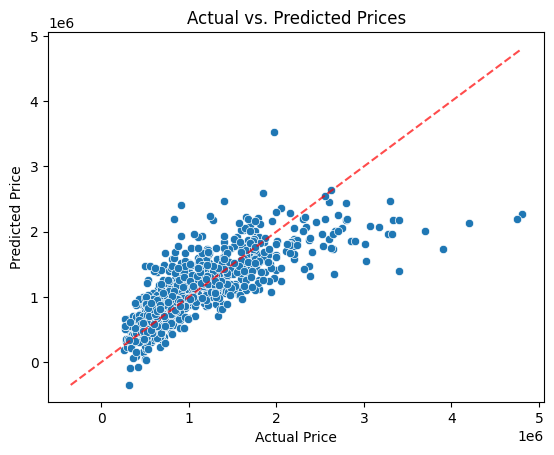

In [20]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
lims = [min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred))]
plt.plot(lims, lims, 'r--', alpha=0.7)  # red dashed line

plt.show()